In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from PIL import Image
import networkx as nx
from matplotlib import cm

%matplotlib inline

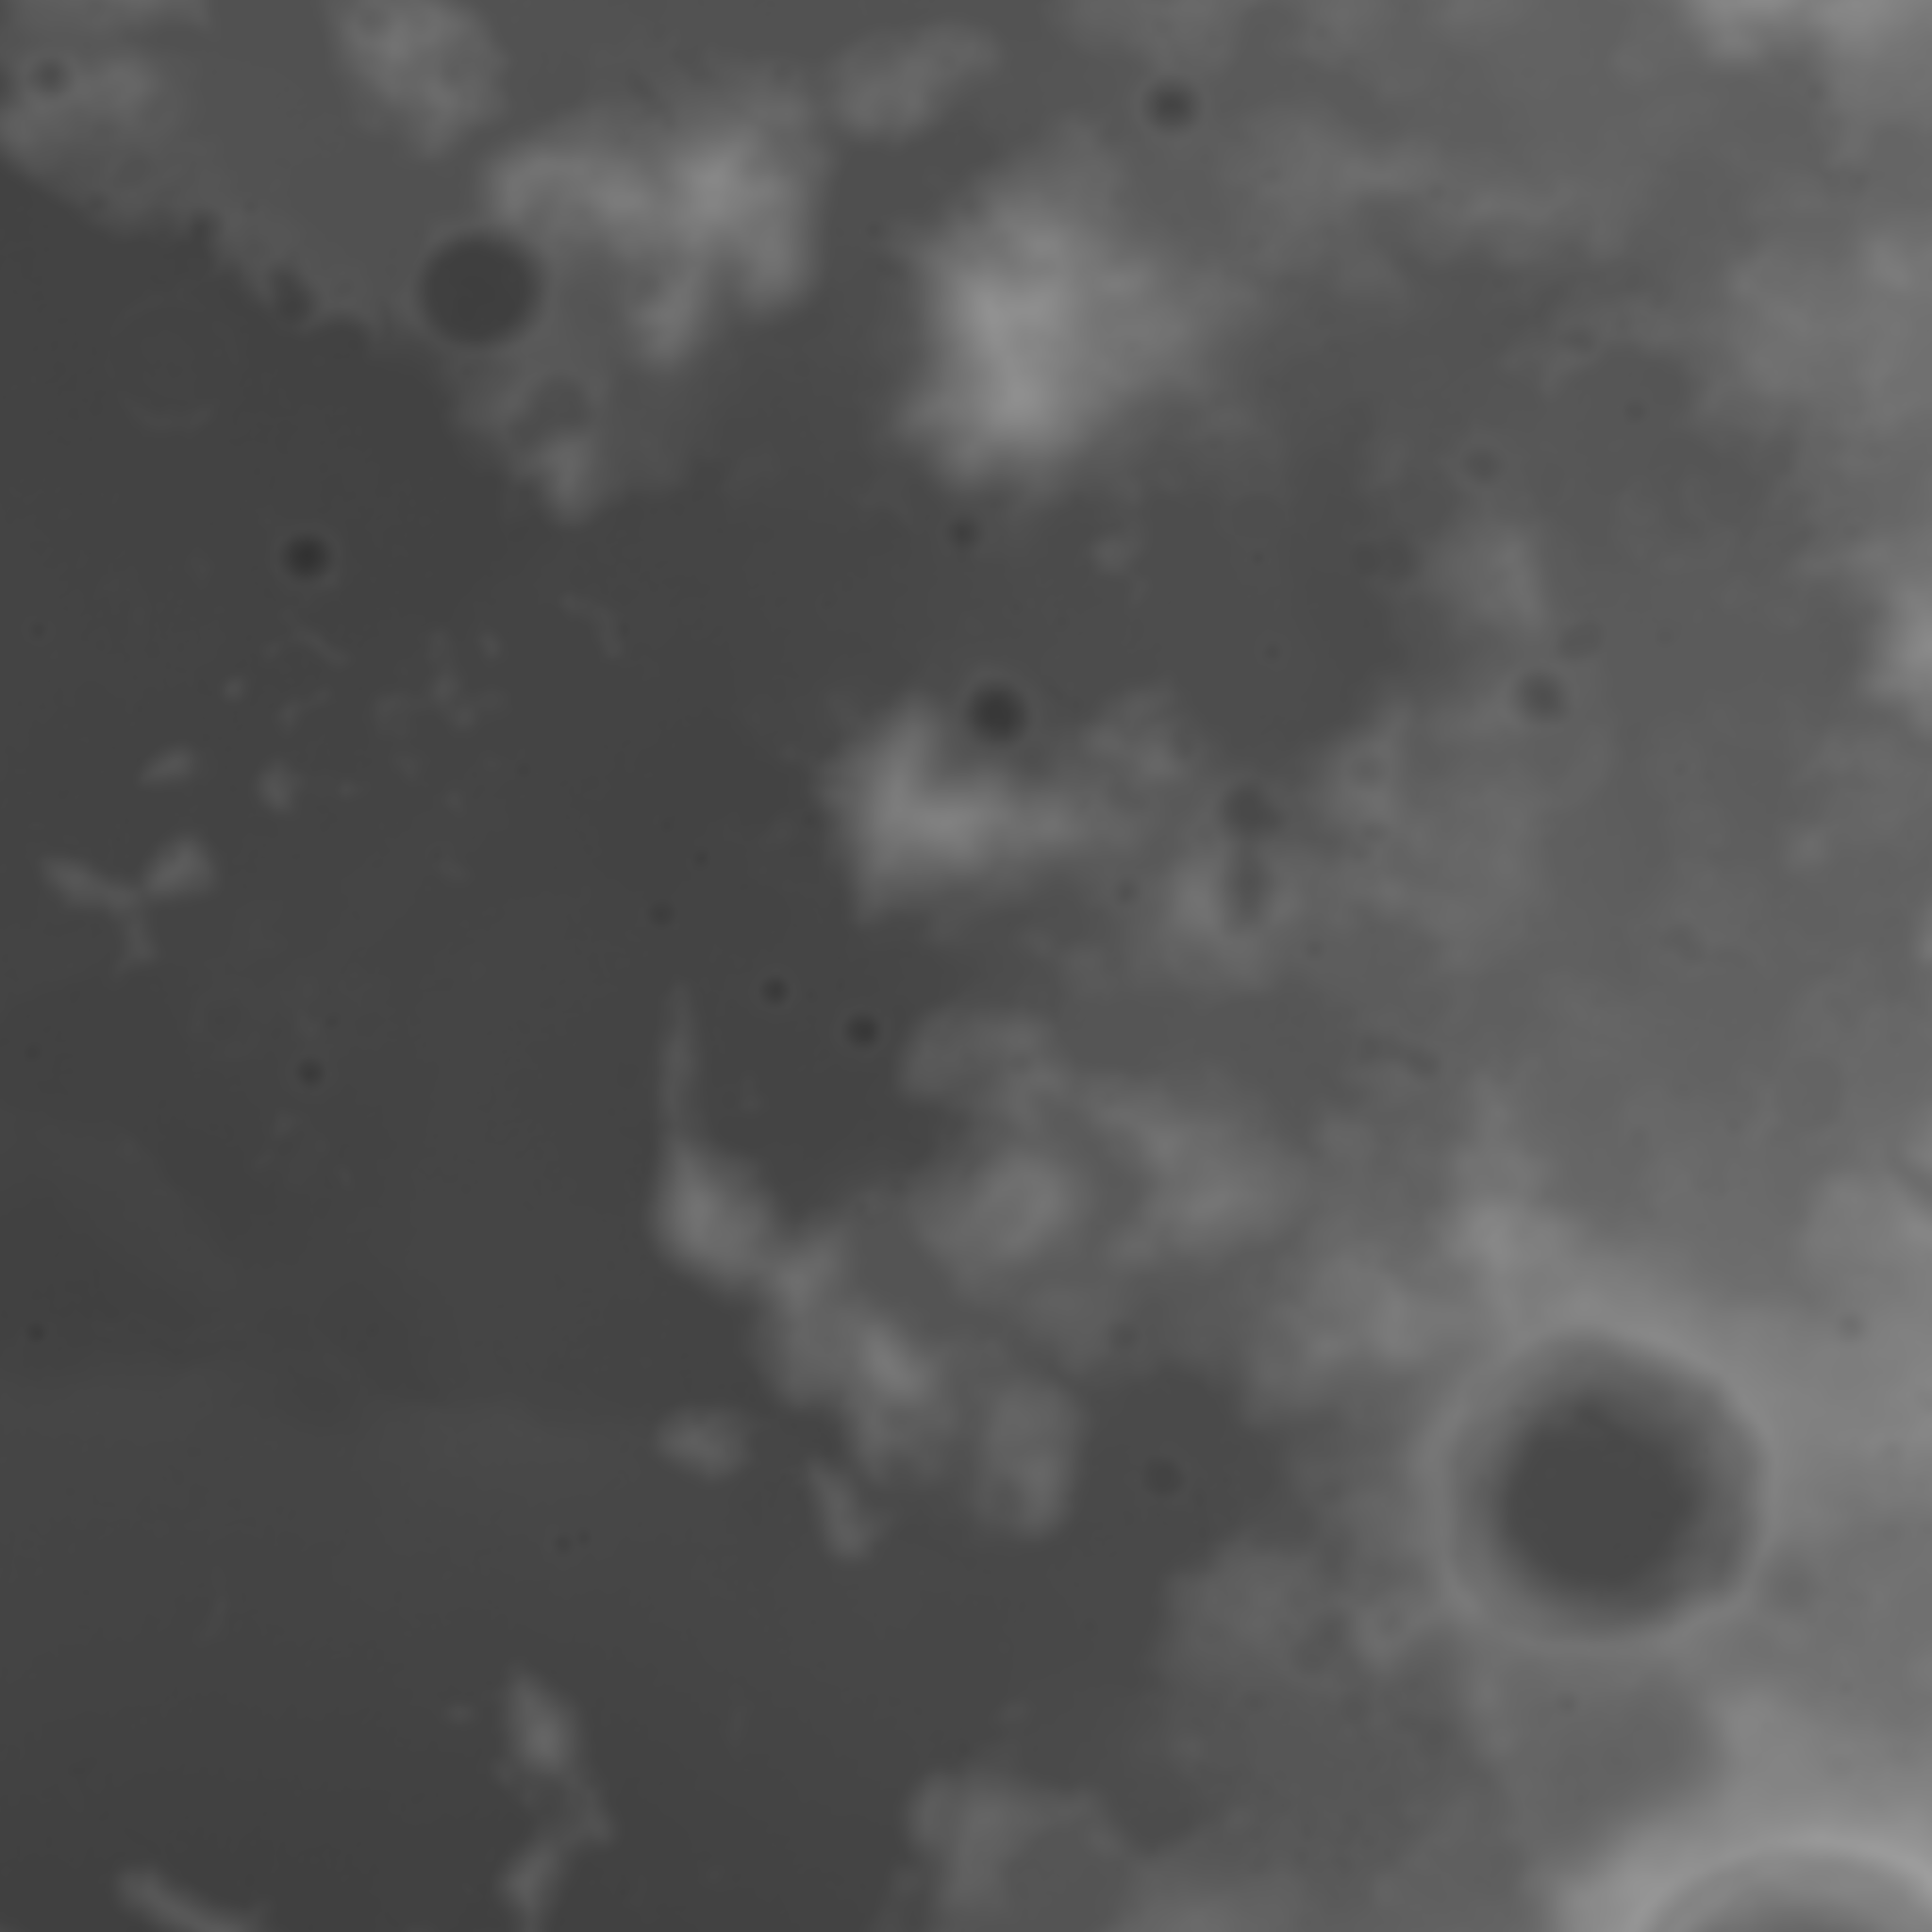

In [2]:
im = Image.open("assets/example1.png")
im = im.convert('L')
im

In [3]:
x, y = np.meshgrid(range(im.width), range(im.height))
x.shape, y.shape

((2048, 2048), (2048, 2048))

In [4]:
image_pixels = np.asarray(im)
z = np.asarray(im)
z.shape

(2048, 2048)

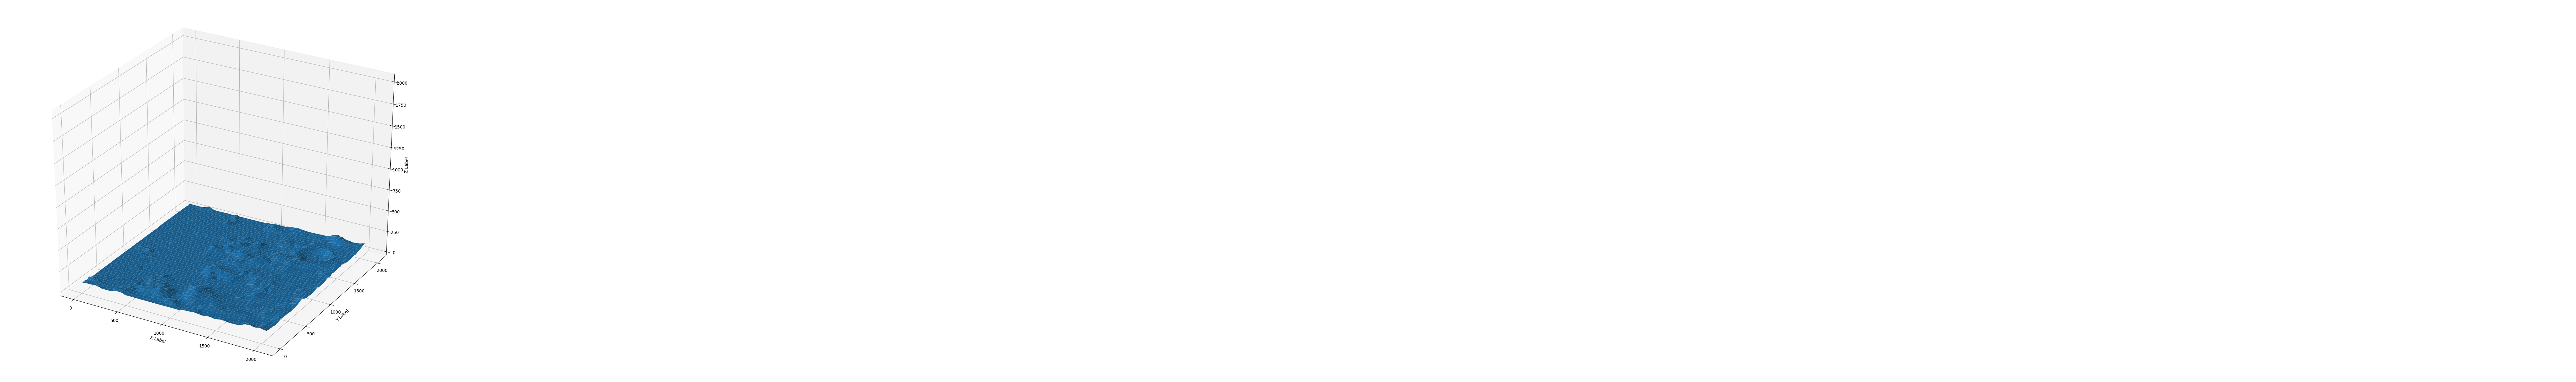

In [5]:
fig = plt.figure(figsize=(18, 16), dpi=100)

ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x, y, z, c='r', marker='o')
ax.plot_surface(x, y, z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_zlim(0, 2048)

plt.show()

In [6]:
SCALE = 8
N = int(2048 / SCALE)
graph = nx.DiGraph()
for _y in range(1, N):
    for _x in range(1, N):
        # TODO: Calculate weights properly
        graph.add_edge('{}_{}'.format(_x, _y), '{}_{}'.format(_x + 1, _y), weight=1)
        graph.add_edge('{}_{}'.format(_x + 1, _y), '{}_{}'.format(_x, _y), weight=1)
        graph.add_edge('{}_{}'.format(_x, _y), '{}_{}'.format(_x, _y + 1), weight=1)
        graph.add_edge('{}_{}'.format(_x, _y + 1), '{}_{}'.format(_x, _y), weight=1)

In [7]:
def get_path(graph, point_a, point_b):
    source_a = '{}_{}'.format(int(point_a[0] / SCALE), int(point_a[1] / SCALE))
    source_b = '{}_{}'.format(int(point_b[0] / SCALE), int(point_b[1] / SCALE))
    path = nx.dijkstra_path(graph, source_a, source_b)
    return [(int(entry.split('_')[0]) * SCALE, int(entry.split('_')[1]) * SCALE) for entry in path]

In [8]:
path = get_path(graph, (500, 500), (1800, 2000))

In [9]:
path_x = np.array([point[0] for point in path])
path_y = np.array([point[1] for point in path])
path_z = np.array([image_pixels[point[0], point[1]] for point in path])

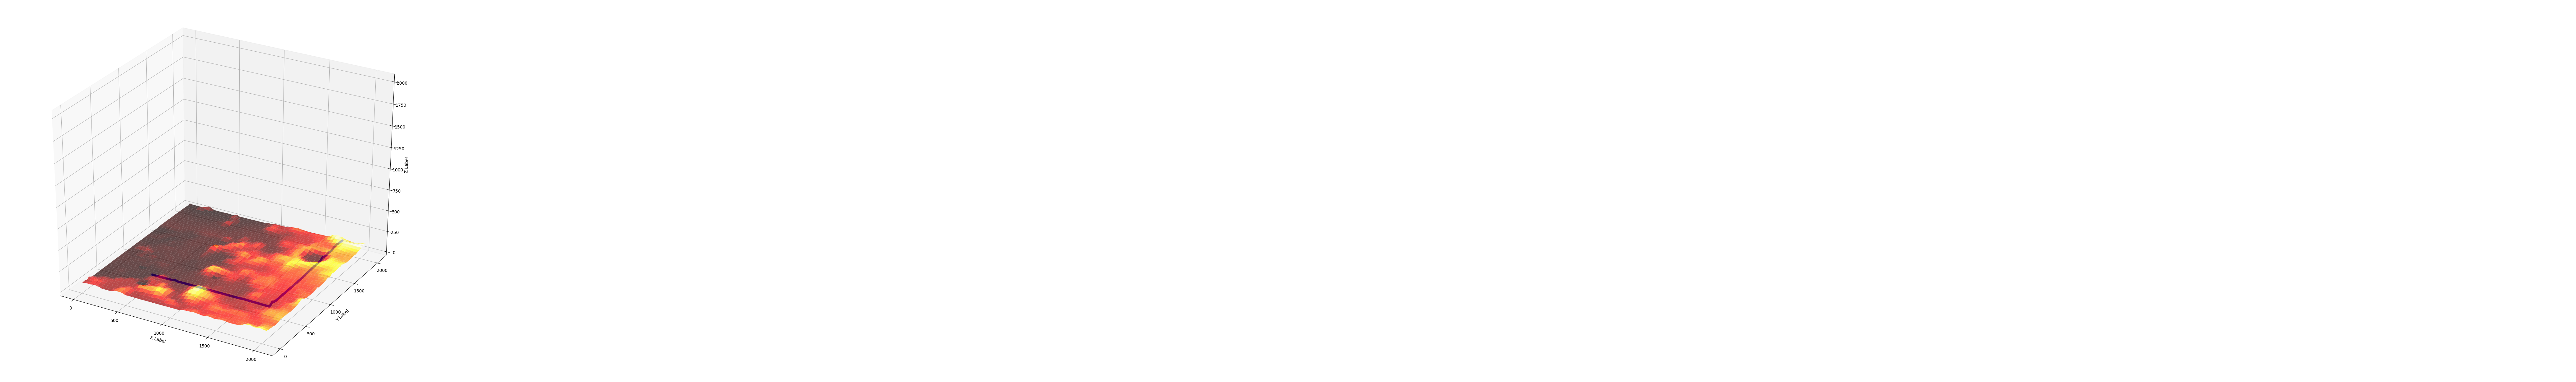

In [35]:
fig = plt.figure(figsize=(18, 16), dpi=100)

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, alpha=0.7, cmap=cm.hot)
ax.scatter(path_x, path_y, path_z + 10, c='b', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_zlim(0, 2048)

plt.show()